In [1]:
# wegen dem Präsentations Tool Rise
# https://rise.readthedocs.io/en/stable/

<div>
    <div>
        <h1>NLP based Recommender System for Plone</h1>
        <strong>Jan Mevissen and Richard Braun</strong>
    </div>
</div>

<div>
    <h1>About us</h1>
    <div style="display: flex; flex-align: row; justify-content: space-between; margin-top: 10px;">
        <ul>
            <li>Interaktiv GmbH from Germany</li>
            <li>We ♥ Plone and Scrum</li>
        </ul>
        <div style="width: 50px;"></div>
        <img src="static/images/Interaktiv_Team.jpg" width="500">
    </div>
</div>

<div>
    <h1>Overview</h1>
    <p>Using NLP Libraries to build a Recommendation System for Plone/Volto.</p>
    <ul>
        <li>Natural Language Processing using scikit-learn</li>
        <li>Demonstration in Plone/Volto</li>
        <li>Prospects and future plans</li>
    </ul>
</div>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from helper import AngleAnnotation, plot_vectorizer_result
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from IPython import display
import pandas as pd
import matplotlib.ticker as ticker
from sklearn.neighbors import NearestNeighbors
from IPython.display import Javascript
from IPython.core.display import HTML
from ipywidgets import widgets
from IPython.display import Markdown


<div>
    <h1>Natural Language Processing using scikit-learn</h1>
    <ul>
      <li>scikit-learn is a Open source Machine Learning Library for Python.</li>
      <li>Example of using scikit-learn to calculate text similarities.</li>  
      <li>All code in this part of the Documentation is "real".</li>  
    </ul>    
</div>

<h4>Starting Point: some "known" texts</h4>

In [3]:
text_a = 'The House is green. The House is nice. House is House'
text_b = 'A green Frog is in the green House.'

<h4>Goal: calculate the similarity to an "unknown" text</h4>

In [4]:
unknown_text = 'The green house on the street. The house is full.'

<h4>Vectorization</h4>

<ul>
  <li>Create a Vocabulary of all unique words. (<b>"Bag of Words"</b>)</li>
  <li>Use each word as a Dimension of a Vectorspace.</li>
  <li>Transform the Texts to Vectors of this Vectorspace.</li>
  <li>Differences between the Vectors can then be calculated.</li>  
</ul>

<h4>CountVectorizer</h4>
<p>Count the Appearance of each word from the Vocabulary</p>

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
count_vectorizer.fit([text_a, text_b])

vocabulary = sorted(list(count_vectorizer.get_feature_names_out()))
print('Vocabulary:', sorted(vocabulary))

Vocabulary: ['frog', 'green', 'house', 'in', 'is', 'nice', 'the']


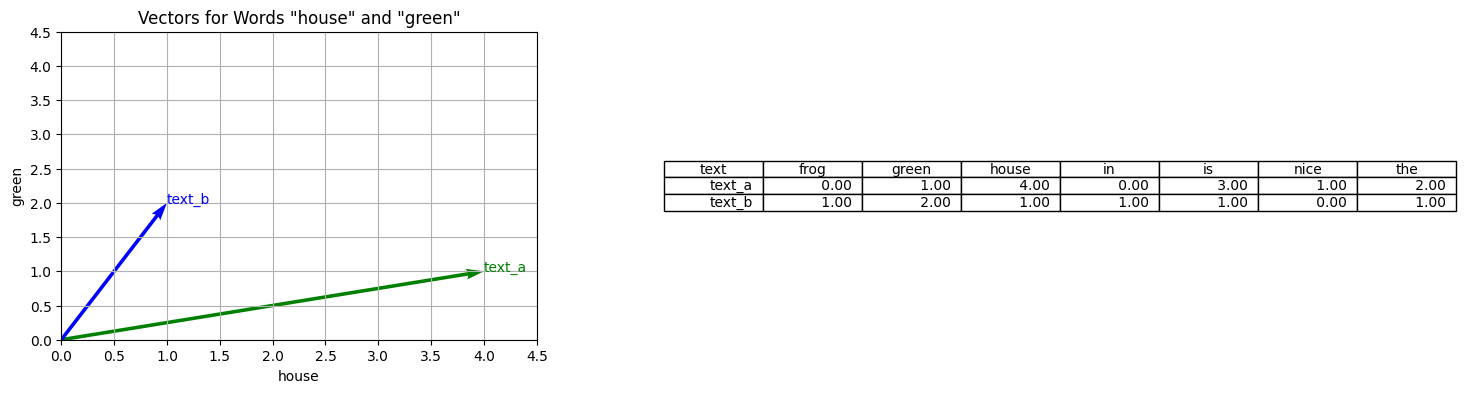

In [6]:
plot_vectorizer_result(count_vectorizer, [text_a, text_b], tickspacing=0.5)

<h4>TF-IDF Vectorizer</h4>

<p>TF: <b>"Term Frequency"</b> is a measure of how often a Word occurs in a Text</p>
<p style="text-align: center">$\textbf{Number of occurences of a word in a Text} \over \textbf{Number of Words in a Text}$</p>
<p>IDF: <b>"Inverse Document Frequency"</b> a measure of the uniqueness of the Word</p>
<p style="text-align: center">$ \log{\frac{\textbf{Number of all Texts}}{\textbf{Number of all Texts containing the Word}}}$</p>



<h4>TF-IDF Vectorizer</h4>

<p>TF x IDF: <b>"Term Frequency"</b> times <b>"Inverse Document Frequency"</b></p>

In [7]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit([text_a, text_b])

vocabulary = sorted(list(tfidf_vectorizer.get_feature_names_out()))
print('Vocabulary:', sorted(vocabulary))

Vocabulary: ['frog', 'green', 'house', 'in', 'is', 'nice', 'the']


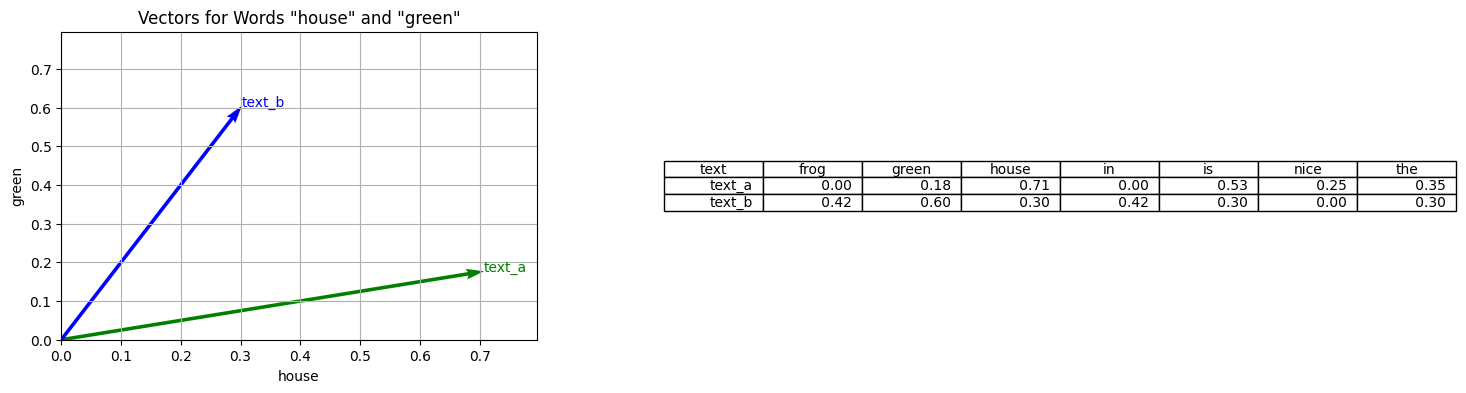

In [8]:
plot_vectorizer_result(tfidf_vectorizer, [text_a, text_b], tickspacing=0.1)

<h4>Compare unknown text to known text</h4>
<p>The Goal was to calculate the similarity to the "unknown" text</p>

In [9]:
def plot_texts(text_a, text_b, unknown_text):
    text_datas = [
        ('text_a', text_a),
        ('text_b', text_b),
        ('unknown_text', unknown_text),
    ]

    table_md = '<table>'
    table_md += '<tr><th>text</th><th>text value</th></tr>'

    for text_name, text_value in text_datas:
        table_md += f'<tr><td>{text_name}</td><td>{text_value}</td></tr>'

    table_md += '</table>'

    display.display(display.Markdown(table_md))

In [10]:
plot_texts(text_a, text_b, unknown_text)

<table><tr><th>text</th><th>text value</th></tr><tr><td>text_a</td><td>The House is green. The House is nice. House is House</td></tr><tr><td>text_b</td><td>A green Frog is in the green House.</td></tr><tr><td>unknown_text</td><td>The green house on the street. The house is full.</td></tr></table>

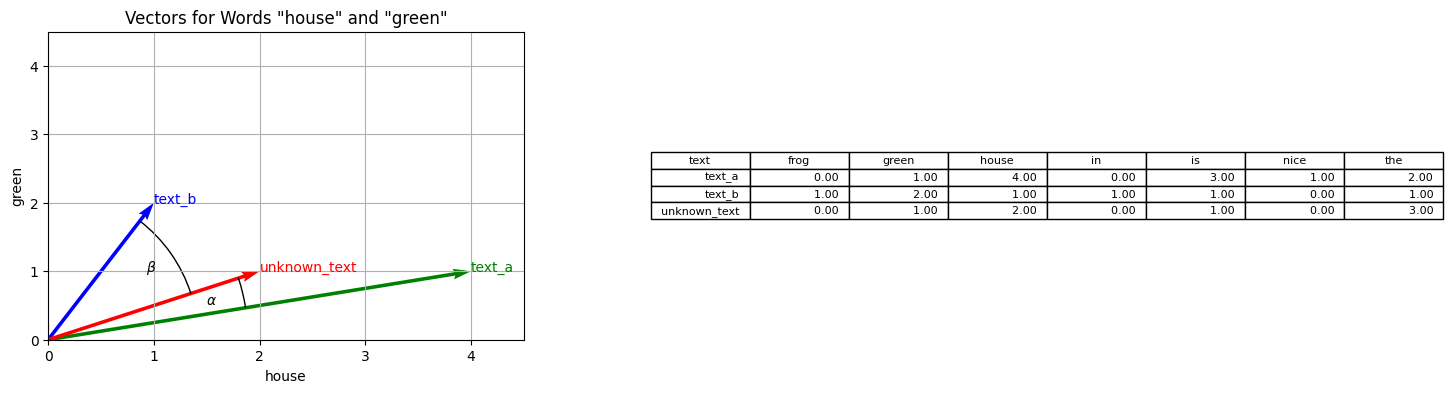

In [11]:
plot_vectorizer_result(count_vectorizer, [text_a, text_b, unknown_text], tickspacing=1)

<h4>Calculate text Similarity using K-Nearest Neighbors</h4>
<ul>
  <li>Fit the NearestNeighbors module to a list of known vectors</li>
  <li>Use the Fitted Module to get the K-Nearest known vectors for a list of unkown vectors.</li>
  <li>NearestNeighbors returns the list indexes of the nearest known vectors and the distances to the unkown vectors.</li>
</ul>    

In [12]:
known_vectors = tfidf_vectorizer.transform([text_a, text_b])
knn = NearestNeighbors(metric='cosine')
knn.fit(known_vectors)

unknown_vectors = tfidf_vectorizer.transform([unknown_text])
distances, indexes = knn.kneighbors(unknown_vectors, n_neighbors=2)

print('distance to text_a:', distances[0][0])
print('distance to text_b:', distances[0][1])

distance to text_a: 0.17809931350664776
distance to text_b: 0.37579948322878665


<div>
    <h1>Implementation in Plone</h1>
    <ul>
        <li>Interaktiv.Recommendations is a Plone package</li>
        <li>Available for Plone Classic and Volto</li>
        <li>Provides a behavior, which can be added to the contenttype of your choice</li>
    </ul>
</div>


<div>
    <h1>Future plans</h1>
    <h2>More possible applications</h2>
    <ul>
        <li>Auto-Tagging</li>
        <li>Part-of-speech-Tagging (POS-Tagging)</li>
        <li>Lemmatization ("walking" -> "walk")</li>
    </ul>
</div>

<div>
    <h1>Thanks for you attention</h1>
    <div style="display: flex; flex-direction: row;">
        <div>
            <p>Packages are available on Github:</p>
            <ul>
                <li><a href="https://github.com/interaktivgmbh/interaktiv.recommendations">@interaktivgmbh/interaktiv.recommendations</a></li>
                <li><a href="https://github.com/interaktivgmbh/volto-recommendations">@interaktivgmbh/volto-recommendations</a></li>
            </ul>
        </div>
        <div style="width: 50px;"></div>
        <img src="static/images/unicorn_plone.png" width="500"=>
    </div>
</div>

<div>
    <h1>Sources/Tools</h1>
    <ul>
        <li>
            <span>Jupyter Notebook: </span>
            <a href="https://jupyter.org/">https://jupyter.org/</a>
        </li>
        <li>
            <span>scikit-learn: </span>
            <a href="https://scikit-learn.org/stable/">https://scikit-learn.org/</a>
        </li>
        <li>
            <span>Plone: </span>
            <a href="https://plone.org/">https://plone.org/</a>
        </li>
        <li>
            <span>Volto: </span>
            <a href="https://github.com/plone/volto">https://github.com/plone/volto</a>
        </li>
        <li>
            <span>PyCharm: </span>
            <a href="https://github.com/plone/volto">https://github.com/plone/volto</a>
        </li>
    </ul>
</div>